In [1]:
#pip install wordcloud matplotlib

### 1. Data Exploration and Preprocessing

In [2]:
import pandas as pd
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

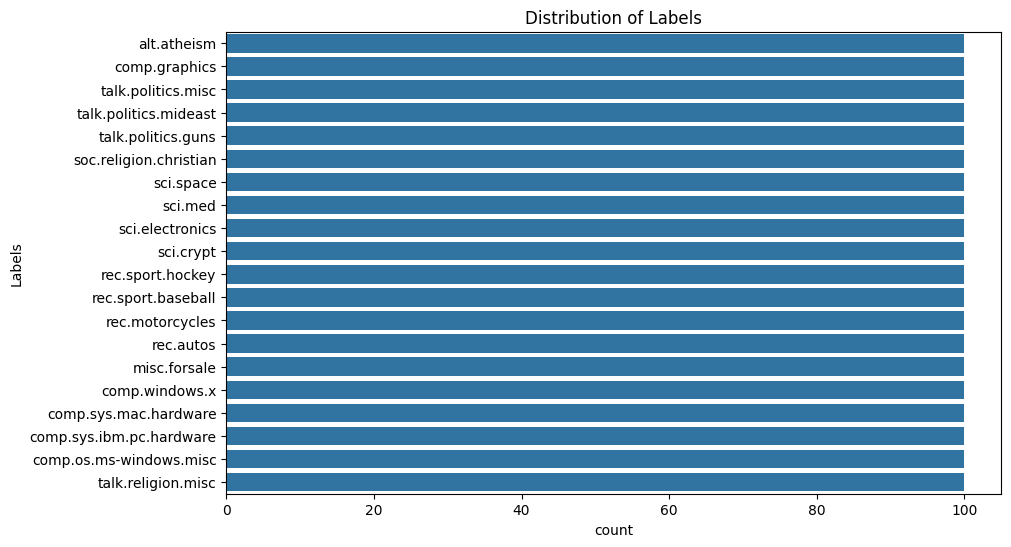

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Labels', data=df, order = df['Labels'].value_counts().index)
plt.title('Distribution of Labels')
plt.show()

In [8]:
text = " ".join(df['Data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

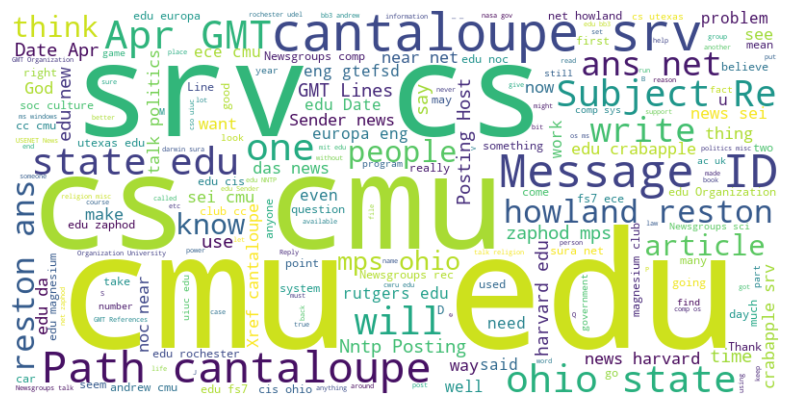

In [9]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### converting to lowercase

In [10]:
# normalization
df['Data'] = df['Data'].str.lower()
df

,Data,Labels
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,alt.atheism
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


### removing punctuation

In [11]:
import string
df['Data'] = df['Data'].str.replace('[{}]'.format(string.punctuation), '')

In [12]:
#pip install nltk

In [13]:
#import nltk
#nltk.download('all')

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df['Cleaned_Data'] = df['Data'].apply(clean_text)
df['Tokenized_Data'] = df['Cleaned_Data'].apply(tokenize_and_remove_stopwords)

display(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Runku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Runku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Runku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Data,Labels,Cleaned_Data,Tokenized_Data
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs..."
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun..."
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu..."
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,"[xref, cantaloupesrvcscmuedu, altatheism53485,..."


### removing stopwords

In [15]:
# apply lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Data'] = df['Data'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [16]:
# removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Data'] = df['Data'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

In [17]:
text = " ".join(df['Data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

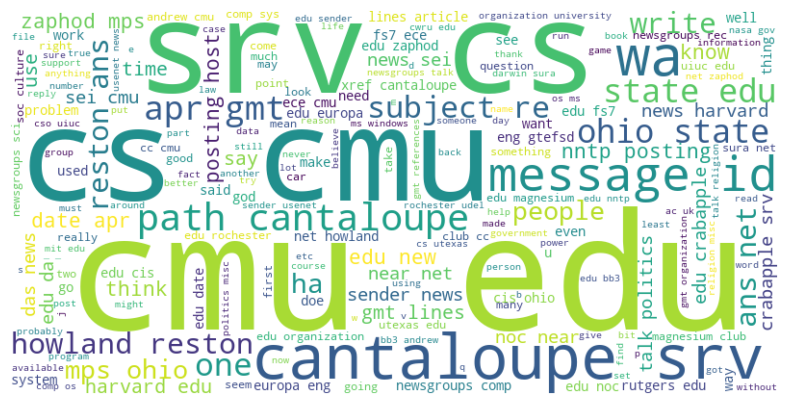

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### feature extraction

In [29]:
Y = df['Data']
X = df['Labels']

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [31]:
X = vectorizer.fit_transform(X)
x_new = X.toarray()
x_new.shape

(2000, 32)

In [22]:
#pip install gensim

In [23]:
from gensim.models import Word2Vec
import numpy as np

In [24]:
from nltk.tokenize import word_tokenize
sentences = df['Data'].apply(lambda x: word_tokenize(str(x).lower()))

In [25]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [26]:
X_wv = [model.wv[sentence].mean(axis=0) for sentence in sentences if len(sentence) > 0]

In [27]:
import numpy as np
X_wv = np.array(X_wv)
X_wv.shape

(2000, 100)

### 2. Naive Bayes Model for Text Classification

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(x_new,Y,test_size=0.30,random_state=100)

In [33]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, Y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [34]:
Y_Pred_test = model.predict(X_test)

In [35]:
X = X_wv
Y = df['Labels']

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [38]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [39]:
Y_wv_Pred_test = model.predict(X_test)

### 3. Sentiment Analysis

In [40]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#### Perform sentiment analysis

In [41]:
def categorize_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Data'].apply(categorize_sentiment)
display(df.head())

,Data,Labels,Cleaned_Data,Tokenized_Data,Sentiment
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",Negative
1,newsgroups: alt.atheism path: cantaloupe.srv.c...,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs...",Positive
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",Negative
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",Negative
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,"[xref, cantaloupesrvcscmuedu, altatheism53485,...",Positive


In [50]:
df['compound_score'] = df['Data'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Sentiment'] = df['compound_score'].apply(lambda x: 'positive' if x > 0 else 'negative')
display(df.head())

,Data,Labels,Cleaned_Data,Tokenized_Data,Sentiment,compound_score
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",negative,-0.9870
1,newsgroups: alt.atheism path: cantaloupe.srv.c...,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs...",positive,0.9393
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",negative,-0.9864
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",negative,-0.9996
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,"[xref, cantaloupesrvcscmuedu, altatheism53485,...",positive,0.9783


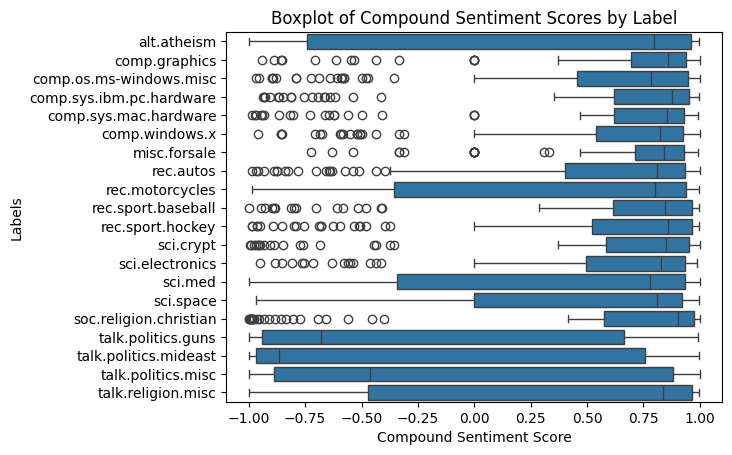

In [49]:
sns.boxplot(x='compound_score', y='Labels', data=df)
plt.title('Boxplot of Compound Sentiment Scores by Label')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Labels')
plt.show()

#### Analyze sentiment distribution

In [44]:
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
display(sentiment_distribution)

Sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,42,1,57
comp.graphics,14,2,84
comp.os.ms-windows.misc,25,1,74
comp.sys.ibm.pc.hardware,20,3,77
comp.sys.mac.hardware,27,3,70
comp.windows.x,19,3,78
misc.forsale,8,11,81
rec.autos,26,2,72
rec.motorcycles,32,3,65


In [45]:
df[["Labels","Sentiment"]].value_counts()

Labels                    Sentiment
comp.graphics             Positive     84
misc.forsale              Positive     81
comp.windows.x            Positive     78
comp.sys.ibm.pc.hardware  Positive     77
sci.electronics           Positive     77
comp.os.ms-windows.misc   Positive     74
rec.sport.baseball        Positive     72
rec.autos                 Positive     72
sci.crypt                 Positive     71
soc.religion.christian    Positive     70
comp.sys.mac.hardware     Positive     70
talk.politics.mideast     Negative     68
talk.politics.guns        Negative     67
rec.sport.hockey          Positive     66
rec.motorcycles           Positive     65
sci.med                   Positive     65
talk.religion.misc        Positive     62
sci.space                 Positive     62
alt.atheism               Positive     57
talk.politics.misc        Negative     52
                          Positive     45
alt.atheism               Negative     42
talk.religion.misc        Negative     3

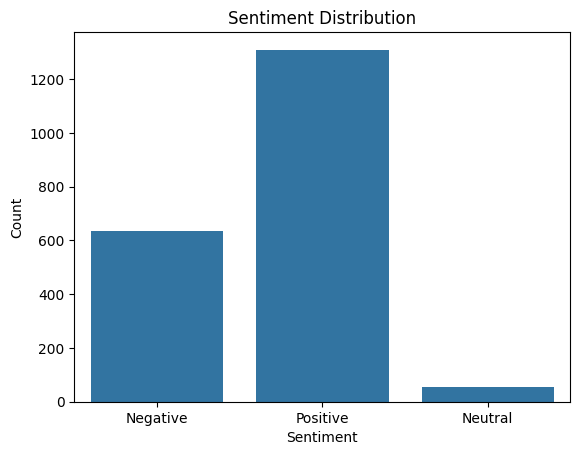

In [46]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

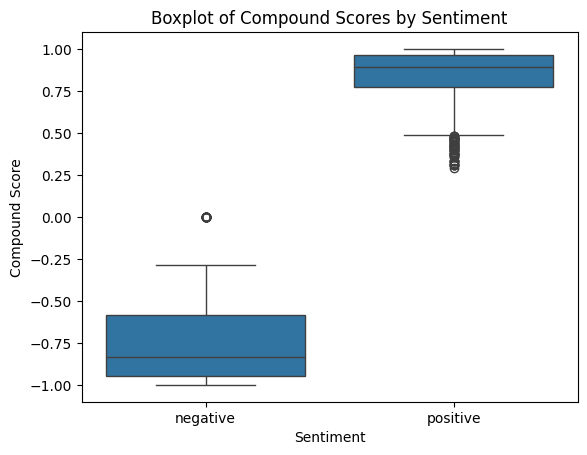

In [51]:
sns.boxplot(x='Sentiment', y='compound_score', data=df)
plt.title('Boxplot of Compound Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Compound Score')
plt.show()

### 4. Evaluation

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report

##### TF-IDF Feature Extraction + Naive Bayes

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_tfidf = TfidfVectorizer(max_features=5000)
X = X_tfidf.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [76]:
print("Naive Bayes with TF-IDF (Best Model):")
print("Best Params:", nb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Precision:", precision_score(y_test, y_pred_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_tfidf, average='weighted'))

Naive Bayes with TF-IDF (Best Model):
Best Params: {'alpha': 0.1}
Accuracy: 0.805
Precision: 0.8168559427522776
Recall: 0.805
F1 Score: 0.8056713707799105


In [77]:
print(classification_report(y_test, y_pred_tfidf))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.80      0.78        20
           comp.graphics       0.85      0.85      0.85        20
 comp.os.ms-windows.misc       0.87      0.65      0.74        20
comp.sys.ibm.pc.hardware       0.48      0.75      0.59        20
   comp.sys.mac.hardware       0.75      0.60      0.67        20
          comp.windows.x       0.71      0.85      0.77        20
            misc.forsale       0.94      0.80      0.86        20
               rec.autos       0.82      0.90      0.86        20
         rec.motorcycles       0.95      0.90      0.92        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       1.00      0.95      0.97        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.88      0.70      0.78        20
         

In [78]:
print("Accuracy Score :",accuracy_score(y_test,Y_wv_Pred_test))
print("Precision Score :",precision_score(y_test,Y_wv_Pred_test,average='macro'))
print("Recall Score :",recall_score(y_test,Y_wv_Pred_test,average='macro'))
print("F1_score Score :",f1_score(y_test,Y_wv_Pred_test,average='macro'))

Accuracy Score : 0.06
Precision Score : 0.08514345602328555
Recall Score : 0.06000000000000001
F1_score Score : 0.05421755693375345
